# **Music Recommendation System**

# **Milestone 1**

## **Problem Definition**

**The context** - Why is this problem important to solve?<br>
**The objectives** - What is the intended goal?<br>
**The key questions** - What are the key questions that need to be answered?<br>
**The problem formulation** - What is it that we are trying to solve using data science?


## **Data Dictionary**

The core data is the Taste Profile Subset released by The Echo Nest as part of the Million Song Dataset. There are two files in this dataset. One contains the details about the song id, titles, release, artist name and the year of release. Second file contains the user id, song id and the play count of users.

song_data

song_id - A unique id given to every song

title - Title of the song

Release - Name of the released album

Artist_name - Name of the artist 

year - Year of release

count_data

user _id - A unique id given to the user

song_id - A unique id given to the song

play_count - Number of times the song was played

## **Data Source**
http://millionsongdataset.com/

## **Important Notes**

- This notebook can be considered a guide to refer to while solving the problem. The evaluation will be as per the Rubric shared for each Milestone. Unlike previous courses, it does not follow the pattern of the graded questions in different sections. This notebook would give you a direction on what steps need to be taken in order to get a viable solution to the problem. Please note that this is just one way of doing this. There can be other 'creative' ways to solve the problem and we urge you to feel free and explore them as an 'optional' exercise. 

- In the notebook, there are markdown cells called - Observations and Insights. It is a good practice to provide observations and extract insights from the outputs.

- The naming convention for different variables can vary. Please consider the code provided in this notebook as a sample code.

- All the outputs in the notebook are just for reference and can be different if you follow a different approach.

- There are sections called **Think About It** in the notebook that will help you get a better understanding of the reasoning behind a particular technique/step. Interested learners can take alternative approaches if they want to explore different techniques. 

### **Importing Libraries and the Dataset**

In [1]:
#Mounting the drive
#from google.colab import drive
#drive.mount('/content/drive')

In [1]:
import warnings #Used to ignore the warning given as output of the code.
warnings.filterwarnings('ignore')

import numpy as np # Basic libraries of python for numeric and dataframe computations.
import pandas as pd

import matplotlib.pyplot as plt #Basic library for data visualization.
import seaborn as sns #Slightly advanced library for data visualization

from sklearn.metrics.pairwise import cosine_similarity #To compute the cosine similarity between two vectors.
from collections import defaultdict #A dictionary output that does not raise a key error

from sklearn.metrics import mean_squared_error # A performance metrics in sklearn.

In [2]:
#importing the datasets
count_df = pd.read_csv('count_data.csv')
song_df = pd.read_csv('song_data.csv')

### **Understanding the data by viewing a few observations**

In [3]:
# See top 10 records of count_df data
count_df.head(n=10) 

,Unnamed: 0,user_id,song_id,play_count
0,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1
5,5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODDNQT12A6D4F5F7E,5
6,6,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODXRTY12AB0180F3B,1
7,7,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFGUAY12AB017B0A8,1
8,8,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFRQTD12A81C233C0,1
9,9,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOHQWYZ12A6D4FA701,1


In [4]:
# See top 10 records of song_df data
song_df.head(n=10) 

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0
5,SOZVAPQ12A8C13B63C,"Symphony No. 1 G minor ""Sinfonie Serieuse""/All...",Berwald: Symphonies Nos. 1/2/3/4,David Montgomery,0
6,SOQVRHI12A6D4FB2D7,We Have Got Love,Strictly The Best Vol. 34,Sasha / Turbulence,0
7,SOEYRFT12AB018936C,2 Da Beat Ch'yall,Da Bomb,Kris Kross,1993
8,SOPMIYT12A6D4F851E,Goodbye,Danny Boy,Joseph Locke,0
9,SOJCFMH12A8C13B0C2,Mama_ mama can't you see ?,March to cadence with the US marines,The Sun Harbor's Chorus-Documentary Recordings,0


### **Let us check the data types and and missing values of each column**

In [5]:
# See the info of the count_df data

count_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   Unnamed: 0  int64 
 1   user_id     object
 2   song_id     object
 3   play_count  int64 
dtypes: int64(2), object(2)
memory usage: 61.0+ MB


In [6]:
# See the info of the song_df data
song_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   song_id      1000000 non-null  object
 1   title        999985 non-null   object
 2   release      999995 non-null   object
 3   artist_name  1000000 non-null  object
 4   year         1000000 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 38.1+ MB


#### **Observations and Insights 1 :**


- There are 2,000,000 entries in the count_df file
- There are 1,000,000 entries in the song_df file
- There is a column called "Unnamed: 0" that does not appear to have relevent data. This could potentially be dropped. 
- Only "play_count" and "year" only contain others, while the others types are objects which contain both numbers and letters



In [7]:
# Left merge the count_df and song_df data on "song_id". Drop duplicates from song_df data simultaneously.
df = pd.merge(count_df, song_df.drop_duplicates(), on='song_id', how='left')

# Drop the column 'Unnamed: 0'

df=df.drop(['Unnamed: 0'], axis=1)
df

,user_id,song_id,play_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999
...,...,...,...,...,...,...,...
2054529,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJEYPO12AAA8C6B0E,2,Ignorance (Album Version),Ignorance,Paramore,0
2054530,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJJYDE12AF729FC16,4,Two Is Better Than One,Love Drunk,Boys Like Girls featuring Taylor Swift,2009
2054531,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJKQSF12A6D4F5EE9,3,What I've Done (Album Version),What I've Done,Linkin Park,2007
2054532,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJUXGA12AC961885C,1,Up,My Worlds,Justin Bieber,2010


**Think About It:** As the user_id and song_id are encrypted. Can they be encoded to numeric features?

In [8]:
# Apply label encoding for "user_id" and "song_id"

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['user_id'] = labelencoder.fit_transform(df['user_id'])
df['song_id'] = labelencoder.fit_transform(df['song_id'])
df

#label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'user_id'.
#['user_id_N']= label_encoder.fit_transform(df['user_id'])
 
#['user_id'].unique()
#df


,user_id,song_id,play_count,title,release,artist_name,year
0,54961,153,1,The Cove,Thicker Than Water,Jack Johnson,0
1,54961,413,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,54961,736,1,Stronger,Graduation,Kanye West,2007
3,54961,750,1,Constellations,In Between Dreams,Jack Johnson,2005
4,54961,1188,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999
...,...,...,...,...,...,...,...
2054529,64590,3660,2,Ignorance (Album Version),Ignorance,Paramore,0
2054530,64590,3736,4,Two Is Better Than One,Love Drunk,Boys Like Girls featuring Taylor Swift,2009
2054531,64590,3744,3,What I've Done (Album Version),What I've Done,Linkin Park,2007
2054532,64590,3893,1,Up,My Worlds,Justin Bieber,2010


**Think About It:** As the data also contains users who have listened to very few songs and vice versa, is it required to filter the data so that it contains users who have listened to a good count of songs and vice versa?

In [9]:
# Get the column containing the users
users = df.user_id
# Create a dictionary from users to their number of songs
ratings_count = dict()
for user in users:
    # If we already have the user, just add 1 to their rating count
    if user in ratings_count:
        ratings_count[user] += 1
    # Otherwise, set their rating count to 1
    else:
        ratings_count[user] = 1    

In [10]:
# We want our users to have listened at least 90 songs
RATINGS_CUTOFF = 90
remove_users = []
for user, num_ratings in ratings_count.items():
    if num_ratings < RATINGS_CUTOFF:
        remove_users.append(user)
df = df.loc[~df.user_id.isin(remove_users)]

In [11]:
# Get the column containing the songs
songs = df.song_id
# Create a dictionary from songs to their number of users
ratings_count = dict()
for song in songs:
    # If we already have the song, just add 1 to their rating count
    if song in ratings_count:
        ratings_count[song] += 1
    # Otherwise, set their rating count to 1
    else:
        ratings_count[song] = 1    

In [12]:
# We want our song to be listened by atleast 120 users to be considerd
RATINGS_CUTOFF = 120
remove_songs = []
for song, num_ratings in ratings_count.items():
    if num_ratings < RATINGS_CUTOFF:
        remove_songs.append(song)
df_final= df.loc[~df.song_id.isin(remove_songs)]

In [13]:
# Drop records with play_count more than(>) 5

##REVIEW

#df_final=df_final[df_final['play_count'] > 5]

df_final=df_final[df_final['play_count'] <= 5]




In [14]:
# Check the shape of the data

df_final.shape
df

,user_id,song_id,play_count,title,release,artist_name,year
202,6958,12,1,Aunt Eggma Blowtorch,Everything Is,Neutral Milk Hotel,1995
203,6958,40,1,Full Circle,Breakout,Miley Cyrus,2008
204,6958,151,2,Poor Jackie,Rabbit Habits,Man Man,2008
205,6958,326,1,Hot N Cold (Manhattan Clique Remix Radio Edit),Hot N Cold,Katy Perry,2008
206,6958,447,1,Daisy And Prudence,Distillation,Erin McKeown,2000
...,...,...,...,...,...,...,...
2054290,47786,9847,1,He Can Only Hold Her,Back To Black,Amy Winehouse,2006
2054291,47786,9858,5,Drunk Kid Catholic,Noise Floor [Rarities 98 - 05],Bright Eyes,2000
2054292,47786,9890,2,Cool Dry Place (2007 Remastered LP Version),Traveling Wilburys Vol. 3,Traveling Wilburys,0
2054293,47786,9954,3,Let's Live For Today,150 Rock 'N' Roll Classics,The Grass Roots,1987


## **Exploratory Data Analysis**

### **Let's check the total number of unique users, songs, artists in the data**

Total number of unique user id

In [15]:
# Display total number of unique user_id

df_final['user_id'].nunique()

3337

Total number of unique song id

In [16]:
# Display total number of unique song_id

df_final['song_id'].nunique()

620

Total number of unique artists

In [17]:
# Display total number of unique artists

df_final['artist_name'].nunique()

247

In [18]:
#custom - total number of plays

df_final['play_count'].nunique()

5

#### **Observations and Insights 2 :**

- There are 247 unique artists in the dataset
- There are a  total of 620 unique songs or uniqu song IDs. 
- As per the number of unique users and songs, there is a **possibility of 3337 * 620 = 2,068,940 listens** in the dataset. But **we only have x plays**, i.e. not every user has listened to every song more then 5 times in the dataset. And we can build a recommendation system to recommend songs to users which they have not interacted with.



### **Let's find out about the most interacted songs and interacted users**

Most interacted songs

In [19]:
pd.DataFrame({"total_plays":df_final.groupby('song_id').sum()['play_count']}).sort_values(by='total_plays',ascending=False).head(15)

#pd.DataFrame("total_plays").value_counts()


,total_plays
song_id,
8582,3126
6293,2216
1286,1774
3567,1762
352,1752
2220,1692
7796,1660
7998,1592
310,1580


Most interacted users

In [20]:
pd.DataFrame({"total_plays":df_final.groupby('user_id').sum()['play_count']}).sort_values(by='total_plays',ascending=False).head(15)

,total_plays
user_id,
3237,631
15733,501
62759,479
43041,459
27401,448
37049,442
66268,436
48844,436
23337,434


#### **Observations and Insights:_______**

-song_id "8582" is has the most plays with 3126
-user_id "3237" is the most engaged user with 631 plays


Songs played in a year

In [21]:
count_songs = df_final.groupby('year').count()['title']
count = pd.DataFrame(count_songs)
count.drop(count.index[0], inplace=True)
count.tail()

,title
year,
2006,9004
2007,15623
2008,16626
2009,18554
2010,5307


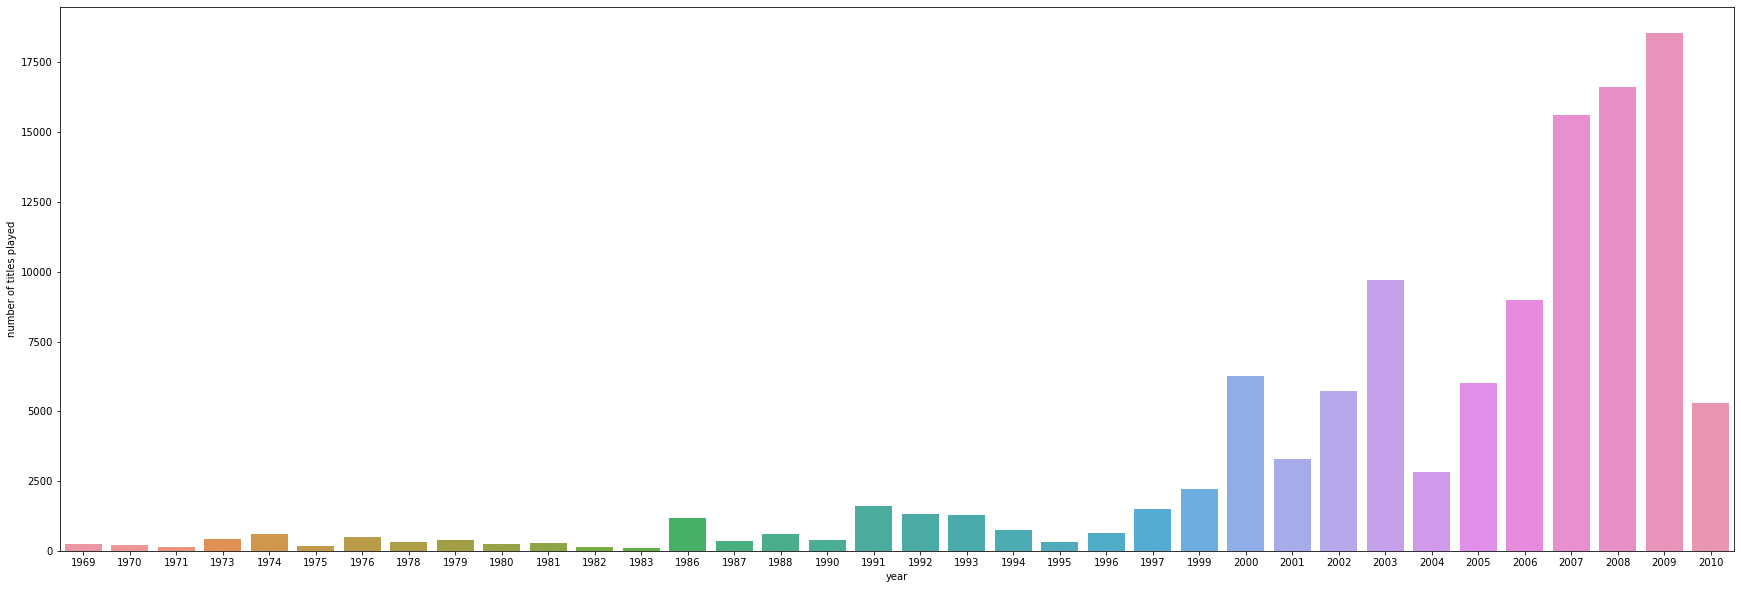

In [22]:
plt.figure(figsize=(30,10))
sns.barplot(x = count.index,
            y = 'title',
            data = count,
            estimator = np.median)
plt.ylabel('number of titles played') 
# Show the plot
plt.show()

#### **Observations and Insights:** # 

- Dataset was created in 2011, so this data only goes up to 2010.
- 2009 is the year in which the most amount of plays occurred. 
- Substantial drop off in 2010, which could mean that data for that year is incomplete, or that there were not as many popular songs in that year, versus 20009. 
- There could be a few songs that drive popularity within a given year. 

**Think About It:** What other insights can be drawn using exploratory data analysis?

## **Proposed approach**

- **Potential Techniques**
-Various recommendation algorithms will be explored 
-rank-based using averages
-User-user-similarity-based collaborative filtering
-Item-item-similarity-based collaborative filtering
-model-based (matrix factorization) collaborative filtering

- **Overall Solution Design**
- Test model(s), tune model(s) then iterate depending on each individual result and metric 

- **Measure of Success**
- Depending on the algorithm, I will be evaluating how each individual outputs to determine which has the highest likelihood of increasing the probability of success
-How close is the predicted action to the actual action taken by the individual user. 
<br>

In [23]:
#Popularity-Based Recommendation Engine

#https://www.kaggle.com/code/mgmarques/million-song-recommendation-engines/notebook

In [24]:
def create_popularity_recommendation(train_data, user_id, item_id, n=10):
    #Get a count of user_ids for each unique song as recommendation score
    train_data_grouped = train_data.groupby([item_id]).agg({user_id: 'count'}).reset_index()
    train_data_grouped.rename(columns = {user_id: 'score'},inplace=True)
    
    #Sort the songs based upon recommendation score
    train_data_sort = train_data_grouped.sort_values(['score', item_id], ascending = [0,1])
    
    #Generate a recommendation rank based upon score
    train_data_sort['Rank'] = train_data_sort.score.rank(ascending=0, method='first')
        
    #Get the top n recommendations
    popularity_recommendations = train_data_sort.head(n)
    return popularity_recommendations

In [25]:
recommendations = create_popularity_recommendation(df,'user_id','title', 15)
display(recommendations)

,title,score,Rank
8804,Use Somebody,1792,1.0
9401,Yellow,1384,2.0
1971,Dog Days Are Over (Radio Edit),1075,3.0
4831,Love Story,1049,4.0
7251,Somebody To Love,1037,5.0
2029,Don't Stop The Music,1029,6.0
6855,Sehr kosmisch,1003,7.0
5686,Nothin' On You [feat. Bruno Mars] (Album Version),910,8.0
6844,Secrets,881,9.0
6515,Revelry,811,10.0


In [26]:
#We can use our popularity recommendation function to find the 10 artists recommendations too.

display(create_popularity_recommendation(df,'user_id','artist_name', 10)) 


,artist_name,score,Rank
649,Coldplay,9588,1.0
1651,Kings Of Leon,6093,2.0
2948,The Killers,5986,3.0
2852,The Black Keys,5886,4.0
1369,Jack Johnson,4770,5.0
2074,Muse,4751,6.0
2375,Radiohead,4452,7.0
736,Daft Punk,4377,8.0
1106,Florence + The Machine,4005,9.0
1762,Lily Allen,3622,10.0


In [27]:
#Calculating average play_count
average_count = df.groupby('song_id').mean()['play_count'] #Hint: Use groupby function on the song_id column. 

#Calculating the frequency a song is played.
play_freq = df.groupby('song_id').count()['play_count']#Hint: Use groupby function on the song_id column

In [28]:
#Making a dataframe with the average_count and play_freq
final_play = pd.DataFrame({'avg_count':average_count, 'play_freq':play_freq})
final_play.head()

,avg_count,play_freq
song_id,,
0,4.615385,13
1,3.109091,55
2,2.000000,7
3,2.416667,12
4,1.867925,53


# **Music Recommendation System**

# **Milestone 2**

Now that we have explored the data, let's apply different algorithms to build recommendation systems

**Note:** Use the shorter version of the data i.e. the data after the cutoffs as used in Milestone 1.

### **Popularity-Based Recommendation Systems**

Let's take the count and sum of play counts of the songs and build the popularity recommendation systems on the basis of the sum of play counts.

In [29]:
import warnings #Used to ignore the warning given as output of the code.
warnings.filterwarnings('ignore')

import numpy as np # Basic libraries of python for numeric and dataframe computations.
import pandas as pd

import matplotlib.pyplot as plt #Basic library for data visualization.
import seaborn as sns #Slightly advanced library for data visualization

from sklearn.metrics.pairwise import cosine_similarity #To compute the cosine similarity between two vectors.
from collections import defaultdict #A dictionary output that does not raise a key error

from sklearn.metrics import mean_squared_error # A performance metrics in sklearn.

In [30]:
#Calculating average play_count
average_count = df_final.groupby('song_id').mean()['play_count'] #Hint: Use groupby function on the song_id column. 

play_freq = df_final.groupby('song_id').count()['play_count']

In [31]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138301 entries, 206 to 2054290
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   user_id      138301 non-null  int32 
 1   song_id      138301 non-null  int32 
 2   play_count   138301 non-null  int64 
 3   title        138301 non-null  object
 4   release      138301 non-null  object
 5   artist_name  138301 non-null  object
 6   year         138301 non-null  int64 
dtypes: int32(2), int64(2), object(3)
memory usage: 7.4+ MB


In [32]:
#Making a dataframe with the average_count and play_freq
final_play = pd.DataFrame({'avg_count':average_count, 'play_freq':play_freq})
final_play.head(10)

,avg_count,play_freq
song_id,,
21,1.631387,274
22,1.464286,140
50,1.616822,107
52,1.715232,453
62,1.727273,121
93,1.436975,119
97,1.616915,402
114,1.869048,168
118,1.836207,116


Now, let's create a function to find the top n songs for a recommendation based on the average play count of song. We can also add a threshold for a minimum number of playcounts for a song to be considered for recommendation.

In [33]:
#Build the function for finding top n songs
def top_n_songs(df_final, n, min_interaction=100):
    
    #Finding songs with minimum number of interactions
    recommendations = df_final[df_final['play_freq'] > min_interaction]
    
    #Sorting values w.r.t average_count
    recommendations = recommendations.sort_values(by='avg_count', ascending=False)
    return recommendations.index[:n]

In [34]:
#Recommend top 10 songs using the function defined above

list(top_n_songs(final_play, 10, 100))

[7224, 6450, 8324, 9942, 8483, 5531, 657, 5653, 614, 2220]

### **User User Similarity-Based Collaborative Filtering**

To build the user-user-similarity based and subsequent models we will use the "surprise" library.

In [35]:
# Import necessary libraries
# To compute the accuracy of models
from surprise import accuracy

# class is used to parse a file containing play_counts, data should be in structure - user; item ; play_count
from surprise.reader import Reader

# class for loading datasets
from surprise.dataset import Dataset

# for tuning model hyperparameters
from surprise.model_selection import GridSearchCV

# for splitting the data in train and test dataset
from surprise.model_selection import train_test_split

# for implementing similarity-based recommendation system
from surprise.prediction_algorithms.knns import KNNBasic

# for implementing matrix factorization based recommendation system
from surprise.prediction_algorithms.matrix_factorization import SVD

# for implementing KFold cross-validation
from surprise.model_selection import KFold

#For implementing clustering-based recommendation system
from surprise import CoClustering

ModuleNotFoundError: No module named 'surprise'

In [36]:
#Install the surprise package using pip. Uncomment and run the below code to do the same. 
!pip install surprise 

^C


### Some useful functions

The below is the function to calculate precision@k and recall@k, RMSE and F1_Score@k to evaluate the model performance.

**Think About It:** Which metric should be used for this problem to compare different models?

In [37]:
#The function to calulate the RMSE, precision@k, recall@k and F_1 score. 
def precision_recall_at_k(model, k=30, threshold=1.5):
    """Return precision and recall at k metrics for each user"""

    # First map the predictions to each user.
    user_est_true = defaultdict(list)
    
    #Making predictions on the test data
    predictions=model.test(testset)
    
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. We here set Precision to 0 when n_rec_k is 0.

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. We here set Recall to 0 when n_rel is 0.

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0
    
    #Mean of all the predicted precisions are calculated.
    precision = round((sum(prec for prec in precisions.values()) / len(precisions)),3)
    #Mean of all the predicted recalls are calculated.
    recall = round((sum(rec for rec in recalls.values()) / len(recalls)),3)
    
    accuracy.rmse(predictions)
    print('Precision: ', precision) #Command to print the overall precision
    print('Recall: ', recall) #Command to print the overall recall
    print('F_1 score: ', round((2*precision*recall)/(precision+recall),3)) # Formula to compute the F-1 score.

**Think About It:** In the function precision_recall_at_k above the threshold value used is 1.5. How precision and recall are affected by chaning the threshold? What is the intuition behind using the threshold value 1.5? 

In [38]:
# Instantiating Reader scale with expected rating scale 
reader = Reader(rating_scale=(0,5)) #use rating scale (0,5)

# loading the dataset
data = Dataset.load_from_df(df_final[['user_id', 'song_id','play_count']], reader) #Take only "user_id","song_id", and "play_count"

# splitting the data into train and test dataset
trainset, testset = train_test_split(data, test_size=0.4, random_state=42) # Take test_size=0.4


              
                
                
                

NameError: name 'Reader' is not defined

  Using cached surprise-0.1-py2.py3-none-any.whl (1.8 kB)
  Using cached scikit-surprise-1.1.1.tar.gz (11.8 MB)
  Running setup.py clean for scikit-surprise
Failed to build scikit-surprise
    Running setup.py install for scikit-surprise: started
    Running setup.py install for scikit-surprise: finished with status 'error'


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\avitr\anaconda3\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\avitr\\AppData\\Local\\Temp\\pip-install-4b1qyvrf\\scikit-surprise_a5335fcb8f374c9bac49bb9b0eb23aef\\setup.py'"'"'; __file__='"'"'C:\\Users\\avitr\\AppData\\Local\\Temp\\pip-install-4b1qyvrf\\scikit-surprise_a5335fcb8f374c9bac49bb9b0eb23aef\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\avitr\AppData\Local\Temp\pip-wheel-brekckbb'
       cwd: C:\Users\avitr\AppData\Local\Temp\pip-install-4b1qyvrf\scikit-surprise_a5335fcb8f374c9bac49bb9b0eb23aef\
  Complete output (52 lines):
  C:\Users\avitr\anaconda3\lib\site-packages\setuptools\dist.py:717: UserWarning: Usage of

**Think About It:** How changing the test size would change the results and outputs?

In [40]:
#Build the default user-user-similarity model
sim_options = {'name': 'msd',
               'user_based':'True'}

#KNN algorithm is used to find desired similar items.
sim_user_user = KNNBasic(sim_options=sim_options, verbose=False, random_state=1) #use random_state=1 

# Train the algorithm on the trainset, and predict play_count for the testset
sim_user_user.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k =30.
precision_recall_at_k(sim_user_user, k=30, threshold=1.5) #Use sim_user_user model

RMSE: 1.0237
Precision:  0.444
Recall:  0.631
F_1 score:  0.521


**Observations and Insights:_________**

(REWRITE)

We have calculated RMSE to check how far the overall predicted ratings are from the actual ratings**.

Intuition of Recall - We are getting a recall of ~0.705, which means out of all the relevant products 70.5% are recommended.
Intuition of Precision - We are getting a precision of ~ 0.401, which means out of all the recommended songs 40% are relevant.
Here F_1 score of the baseline model is ~0.505. It indicates that only 50% of the songs were relevant that were recommended to users.__**

In [41]:
#predicting play_count for a sample user with a listened song.
sim_user_user.predict(6958, 1671, r_ui=2, verbose=True) #use user id 6958 and song_id 1671

user: 6958       item: 1671       r_ui = 2.00   est = 1.63   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.6300980531476479, details={'actual_k': 40, 'was_impossible': False})

In [42]:
#predicting play_count for a sample user with a song not-listened by the user.
sim_user_user.predict(6958,3232, verbose=True) #Use user_id 6958 and song_id 3232

user: 6958       item: 3232       r_ui = None   est = 1.50   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.4954120924135672, details={'actual_k': 40, 'was_impossible': False})

**Observations and Insights:_________**
(REWRITE)
The model prediction of a song that has been listened by a user and a song not listened by a user is the same indicating we need to tune this more to get better model performance.

Now, let's try to tune the model and see if we can improve the model performance.

In [43]:
# setting up parameter grid to tune the hyperparameters
param_grid = {'k': [10, 20, 30], 'min_k': [3, 6, 9],
              'sim_options': {'name': ["cosine",'pearson',"pearson_baseline"],
                              'user_based': [True], "min_support":[2,4]}
              }

# performing 3-fold cross validation to tune the hyperparameters

gs = GridSearchCV(KNNBasic,param_grid, measures=['rmse'], cv=3, n_jobs=-1)

# fitting the data
gs.fit(data) #Use entire data for GridSearch

# best RMSE score
print(gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])


Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity m

In [44]:
# Train the best model found in above gridsearch.
# Step1 : using the optimal similarity measure for user-user based collaborative filtering
sim_options = {'name': 'pearson_baseline',
               'user_based': True,'min_support': 2}

# Step2 :creating an instance of KNNBasic with optimal hyperparameter values
sim_user_user_optimized = KNNBasic(sim_options=sim_options, k=30, min_k=9, random_state=1, verbose=False)

# Step3 :training the algorithm on the trainset
sim_user_user_optimized.fit(trainset)

# Let us compute precision@k and recall@k.
precision_recall_at_k(sim_user_user_optimized)


atrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0136
Precision:  0.443
Recall:  0.736
F_1 score:  0.553


**Observations and Insights:_________**

We can see from above that after tuning hyperparameters, F_1 score of the tuned model is slightly better than the baseline model. Along with this the RMSE of the model has gone down as compared to the model before hyperparameter tuning**. Hence, we can say that the model performance has improved slightly after hyperparameter tuning.


In [45]:
#Predict the play count for a user who has listened to the song. Take user_id 6958, song_id 1671 and r_ui=2

sim_user_user_optimized.predict(6958, 1671, r_ui=2, verbose=True)




user: 6958       item: 1671       r_ui = 2.00   est = 1.95   {'actual_k': 24, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.9453672719637054, details={'actual_k': 24, 'was_impossible': False})

In [46]:
#Predict the play count for a song that is not listened by the user (with user_id 6958)
sim_user_user_optimized.predict(6958,3232, verbose=True)

user: 6958       item: 3232       r_ui = None   est = 1.70   {'was_impossible': True, 'reason': 'Not enough neighbors.'}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.698939503494818, details={'was_impossible': True, 'reason': 'Not enough neighbors.'})

In [47]:
#Use inner id 0. 

sim_user_user_optimized.get_neighbors(0,5)

[693, 27, 1387, 760, 1799]

**Observations and Insights:______________**

**Think About It:** Along with making predictions on listened and unknown songs can we get 5 nearest neighbors (most similar) to a certain user?


Below we will be implementing a function where the input parameters are - 

- data: a **song** dataset
- user_id: a user id **against which we want the recommendations**
- top_n: the **number of songs we want to recommend**
- algo: the algorithm we want to use **for predicting the play_count**
- The output of the function is a **set of top_n items** recommended for the given user_id based on the given algorithm


In [48]:
def get_recommendations(data, user_id, top_n, algo):
    
    # creating an empty list to store the recommended product ids
    recommendations = []
    
    # creating an user item interactions matrix 
    user_item_interactions_matrix = data.pivot(index='user_id', columns='song_id', values='play_count')
    
    print(user_item_interactions_matrix)
    
    # extracting those ids which the user_id has not visited yet
    non_interacted_songs = user_item_interactions_matrix.loc[user_id][user_item_interactions_matrix.loc[user_id].isnull()].index.tolist()
    
    # looping through each of the ids which user_id has not interacted yet
    for song_id in non_interacted_songs:
        
        # predicting the ratings for those non played songs ids by this user
        est = algo.predict(user_id, song_id).est
        
        # appending the predicted ratings
        recommendations.append((song_id, est))

    # sorting the predicted ratings in descending order
    recommendations.sort(key=lambda x: x[1], reverse=True)

    return recommendations[:top_n] # returing top n highest predicted rating products for this user





In [49]:
#Make top 5 recommendations for user_id 6958 with a similarity-based recommendation engine.

recommendations = get_recommendations(df_final,"6958", 5, sim_user_user_optimized)


ValueError: Index contains duplicate entries, cannot reshape

In [ ]:
#Building the dataframe for above recommendations with columns "song_id" and "predicted_ratings"
pd.DataFrame(recommendations, columns=['song_id', 'predicted_ratings'])

**Observations and Insights:______________**

### Correcting the play_counts and Ranking the above songs

In [ ]:
def ranking_songs(recommendations, final_rating):
  # sort the songs based on play counts
  ranked_songs = final_rating.loc[[items[0] for items in recommendations]].sort_values('play_freq', ascending=False)[['play_freq']].reset_index()

  # merge with the recommended songs to get predicted play_count
  ranked_songs = ranked_songs.merge(pd.DataFrame(recommendations, columns=['song_id','predicted_ratings']), on='song_id', how='inner')

  # rank the songs based on corrected play_counts
  ranked_songs['corrected_ratings'] = ranked_songs['predicted_ratings'] - 1 / np.sqrt(ranked_songs['play_freq'])

  # sort the songs based on corrected play_counts
  ranked_songs = ranked_songs.sort_values('corrected_ratings', ascending=False)
  
  return ranked_songs


**Think About It:** In the above function to make the correction in the predicted play_count a quantity 1/np.sqrt(n) is subtracted. What is the intuition behind it? Is it also possible to add this quantity instead of subtracting?

In [ ]:
#Applying the ranking_songs function on the final_play data.

ranking_songs(recommendations, final_play)



**Observations and Insights:______________**

### Item Item Similarity-based collaborative filtering recommendation systems 

In [50]:
#Apply the item-item similarity collaborative filtering model with random_state=1 and evaluate the model performance.

#sim_options = {'name': 'cosine','user_based': False}

#KNN algorithm is used to find desired similar items. 
#sim_item_item - KNNBasic(sim_options=sim_options, random_state=1, verbose= False)

#Train the algorithm on the trainset, and predict ratings or the testset

#sim_item_item.fit(trainset)

#Let us compute precision@K, recall@k, and f_1 score with k -10
#precision_recall_at_k(sim_item_item)



#used "Recommendation_Systems_Case_Study_Notebook_Part1" as a reference


from pandas.core.common import random_state
#Apply the item-item similarity collaborative filtering model with random_state=1 and evaluate the model performance.
sim_options = {'name': 'pearson_baseline',
               'user_based': False}

# creating an instance of KNNBasic with optimal hyperparameter values
sim_item_item= KNNBasic(sim_options=sim_options, random_state=1, verbose=False)

# training the algorithm on the trainset
sim_item_item.fit(trainset)

# Let us compute precision@k and recall@k, f1_score@k and RMSE
precision_recall_at_k(sim_item_item)



RMSE: 1.0124
Precision:  0.445
Recall:  0.576
F_1 score:  0.502


**Observations and Insights:______________**

In [51]:
#predicting play count for a sample user_id 6958 and song (with song_id 1671) heard by the user.

sim_user_user.predict(6958, 1671, r_ui=2, verbose=True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.63   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.6300980531476479, details={'actual_k': 40, 'was_impossible': False})

In [52]:
#Predict the play count for a user that has not listened to the song (with song_id 1671)

sim_item_item.predict(15271,1671, r_ui=0, verbose=True)

user: 15271      item: 1671       r_ui = 0.00   est = 3.77   {'actual_k': 6, 'was_impossible': False}


Prediction(uid=15271, iid=1671, r_ui=0, est=3.7661994135942383, details={'actual_k': 6, 'was_impossible': False})

In [53]:
#Apply grid search for enhancing model performance

# setting up parameter grid to tune the hyperparameters
param_grid = {'k': [10, 20, 30], 'min_k': [3, 6, 9],
              'sim_options': {'name': ["cosine",'pearson',"pearson_baseline"],
                              'user_based': [False], "min_support":[2,4]}
              }

# performing 3-fold cross validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures=['rmse'], cv=3, n_jobs=-1)

# fitting the data
gs.fit(data)

# find best RMSE score
print(gs.best_score['rmse'])

# Extract the combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])



0.9880972099513747
{'k': 30, 'min_k': 3, 'sim_options': {'name': 'pearson_baseline', 'user_based': False, 'min_support': 2}}


**Think About It:** How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the list of hyperparameter [here](https://surprise.readthedocs.io/en/stable/knn_inspired.html).

In [54]:
#Apply the best model found in the grid search.

sim_options = {'name': 'pearson_baseline',
               'user_based': False,'min_support': 2}

# Step2 :creating an instance of KNNBasic with optimal hyperparameter values
sim_item_item_optimized = KNNBasic(sim_options=sim_options, k=30, min_k=6, random_state=1, verbose=False)

# Step3 :training the algorithm on the trainset
sim_item_item_optimized.fit(trainset)

# Let us compute precision@k and recall@k also with k =10.
precision_recall_at_k(sim_item_item_optimized)


RMSE: 1.0016
Precision:  0.441
Recall:  0.676
F_1 score:  0.534


**Observations and Insights:______________**

In [55]:
#Predict the play_count by a user(user_id 6958) for the song (song_id 1671)
sim_user_user_optimized.predict(4, 10, r_ui=4, verbose=True)

user: 4          item: 10         r_ui = 4.00   est = 1.70   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


Prediction(uid=4, iid=10, r_ui=4, est=1.698939503494818, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'})

In [56]:
#predicting play count for a sample user_id 6958 with song_id 3232 which is not heard by the user.
sim_item_item_optimized.predict("6958", "zp713qNhx8d9KCJJnrw1xA", verbose=True)

#Below we are predicting rating for the same userId=4 but for a movie which this user has not interacted before i.e. movieId=3, by using the optimized model as shown below -

sim_user_user_optimized.predict(4, 3, verbose=True)


user: 6958       item: zp713qNhx8d9KCJJnrw1xA r_ui = None   est = 1.70   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: 4          item: 3          r_ui = None   est = 1.70   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


Prediction(uid=4, iid=3, r_ui=None, est=1.698939503494818, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'})

**Observations and Insights:______________**



In [57]:
#Find five most similar users to the user with inner id 0

sim_user_user_optimized.get_neighbors(4, k=5)

[1907, 2230, 1591, 2215, 2357]

In [59]:
#Making top 5 recommendations for user_id 6958 with item_item_similarity-based recommendation engine.
recommendations = get_recommendations(df_final, "6958", 5, sim_item_item_optimized)






ValueError: Index contains duplicate entries, cannot reshape

In [ ]:
#Applying the ranking_songs function. 
ranking_songs(recommendations, final_play)

**Observations and Insights:_________**

### Model Based Collaborative Filtering - Matrix Factorization

Model-based Collaborative Filtering is a **personalized recommendation system**, the recommendations are based on the past behavior of the user and it is not dependent on any additional information. We use **latent features** to find recommendations for each user.

Model-based Collaborative Filtering is a **personalized recommendation system**, the recommendations are based on the past behavior of the user and it is not dependent on any additional information. We use **latent features** to find recommendations for each user.

In [60]:
# Build baseline model using svd

# using SVD matrix factorization
svd = SVD(random_state=1)

# training the algorithm on the trainset
svd.fit(trainset)

# Let us compute precision@k and recall@k with k =10.
precision_recall_at_k(svd)


RMSE: 1.0026
Precision:  0.432
Recall:  0.654
F_1 score:  0.52


In [61]:
# Making prediction for user (with user_id 6958) to song (with song_id 1671), take r_ui=2
svd.predict(6958, 1671, r_ui=2, verbose=True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.33   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.3330243078163533, details={'was_impossible': False})

In [62]:
# Making prediction for user who has not listened the song (song_id 3232)

svd.predict(6958, 3232, r_ui=0, verbose=True)

user: 6958       item: 3232       r_ui = 0.00   est = 1.30   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=0, est=1.2983047805615977, details={'was_impossible': False})

#### Improving matrix factorization based recommendation system by tuning its hyperparameters

In [63]:
# set the parameter space to tune
param_grid = {'n_epochs': [10, 20, 30], 'lr_all': [0.001, 0.005, 0.01],
              'reg_all': [0.2, 0.4, 0.6]}

# performe 3-fold gridsearch cross validation
gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3, n_jobs=-1)

# fitting data
gs.fit(data)

# best RMSE score
print(gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

1.0015725947543637
{'n_epochs': 30, 'lr_all': 0.01, 'reg_all': 0.2}


**Think About It**: How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the available hyperparameters [here](https://surprise.readthedocs.io/en/stable/matrix_factorization.html).

In [64]:
# Building the optimized SVD model using optimal hyperparameters

svd_optimized = SVD(n_epochs=30, lr_all=0.01, reg_all=0.2, random_state=1)

# Train the algorithm on the trainset
svd_optimized=svd_optimized.fit(trainset)

# Use the function precision_recall_at_k to compute precision@k, recall@k, F1-Score@k, and RMSE
precision_recall_at_k(svd_optimized)

RMSE: 1.0085
Precision:  0.414
Recall:  0.645
F_1 score:  0.504


**Observations and Insights:_________**

In [65]:
#Using svd_algo_optimized model to recommend for userId 6958 and song_id 1671.
svd_optimized.predict(6958, 1671, r_ui=2, verbose=True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.28   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.2838400390467515, details={'was_impossible': False})

In [66]:
#Using svd_algo_optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline rating.
svd_optimized.predict(6958, 3232, r_ui=None, verbose=True)


user: 6958       item: 3232       r_ui = None   est = 1.40   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.3997025482649295, details={'was_impossible': False})

**Observations and Insights:_________**

In [67]:
# Getting top 5 recommendations for user_id 6958 using "svd_optimized" algorithm.

svd_recommendations = get_recommendations(df_final, "6958", 10, svd_optimized)



ValueError: Index contains duplicate entries, cannot reshape

In [68]:
#Ranking songs based on above recommendations

ranking_songs(svd_recommendations, final_play)

NameError: name 'ranking_songs' is not defined

In [ ]:
**Observations and Insights:_________**

### Cluster Based Recommendation System

In **clustering-based recommendation systems**, we explore the **similarities and differences** in people's tastes in songs based on how they rate different songs. We cluster similar users together and recommend songs to a user based on play_counts from other users in the same cluster.

In [69]:
# Make baseline clustering model

clust_baseline = CoClustering(random_state=1)

clust_baseline.fit(trainset)

# Let us compute precision@k and recall@k with k =10.
precision_recall_at_k(clust_baseline)


RMSE: 1.0428
Precision:  0.398
Recall:  0.594
F_1 score:  0.477


In [70]:
#Making prediction for user_id 6958 and song_id 1671.
clust_baseline.predict(6958, 1671, verbose=True)

user: 6958       item: 1671       r_ui = None   est = 1.36   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=None, est=1.3627795906030837, details={'was_impossible': False})

In [71]:
#Making prediction for user (userid 6958) for a song(song_id 3232) not heard by the user.
clust_baseline.predict(6958, 3232, r_ui=0, verbose=True)

user: 6958       item: 3232       r_ui = 0.00   est = 1.55   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=0, est=1.5488944215348255, details={'was_impossible': False})

#### Improving clustering-based recommendation system by tuning its hyper-parameters

In [72]:
# set the parameter space to tune
param_grid = {'n_cltr_u':[5,6,7,8], 'n_cltr_i': [5,6,7,8], 'n_epochs': [10,20,30]}

# performing 3-fold gridsearch cross validation
gs = GridSearchCV(CoClustering, param_grid, measures=['rmse'], cv=3, n_jobs=-1)

# fitting data
gs.fit(data)

# best RMSE score
print(gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

1.0502042751232665
{'n_cltr_u': 5, 'n_cltr_i': 5, 'n_epochs': 30}


**Think About It**: How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the available hyperparameters [here](https://surprise.readthedocs.io/en/stable/co_clustering.html).

In [73]:
# Train the tuned Coclustering algorithm
clust_tuned = CoClustering(n_cltr_u=5,n_cltr_i=5, n_epochs=10, random_state=1)

# training the algorithm on the trainset
clust_tuned.fit(trainset)

# Let us compute precision@k and recall@k with k =10.
precision_recall_at_k(clust_tuned)

RMSE: 1.0617
Precision:  0.399
Recall:  0.561
F_1 score:  0.466


**Observations and Insights:_________**

In [74]:
#Using co_clustering_optimized model to recommend for userId 6958 and song_id 1671.
clust_tuned.predict(6958, 1671, r_ui=2, verbose=True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.43   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.43338956866177, details={'was_impossible': False})

In [75]:
#Use Co_clustering based optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline rating.


clust_tuned.predict(6958, 3232, verbose=True)

user: 6958       item: 3232       r_ui = None   est = 1.12   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.1162002534531466, details={'was_impossible': False})

**Observations and Insights:_________**

#### Implementing the recommendation algorithm based on optimized CoClustering model

In [76]:
#Getting top 5 recommendations for user_id 6958 using "Co-clustering based optimized" algorithm.

clustering_recommendations = get_recommendations(df_final, 6958, 5, clust_tuned)

ValueError: Index contains duplicate entries, cannot reshape

### Correcting the play_count and Ranking the above songs

In [77]:
#Ranking songs based on above recommendations
#ranking_songs(clustering_recommendations, final_play)

#sort the songs basd on play counts

ranked_songs = final_rating.loc[[items[0] for items in recommendations]].sort_values('play_freq', ascending=False)[['play_freq']].reset_index()

#merge with teh recommended songs to get the predicted play_count
ranked_songs["corrected_ratings"] = ranked_songs['predicted_ratings'] - 1 / np.sqrt(ranked_songs['play_freq'])

#sort the songs based on the corrected play_counts
ranked_songs = ranked_songs.sort_values('corrected_play_counts', ascending = False)

return ranked_songs




NameError: name 'final_rating' is not defined

**Observations and Insights:_________**

### Content Based Recommendation Systems

**Think About It:** So far we have only used the play_count of songs to find recommendations but we have other information/features on songs as well. Can we take those song features into account?

**Think About It:** So far we have only used the play_count of songs to find recommendations but we have other information/features on songs as well. Can we take those song features into account

In [78]:
df_small=df_final

In [79]:
# Concatenate the "title","release","artist_name" columns to create a different column named "text"

df_small['text'] = df_final['title']+df_final['release']+df['artist_name']
df_small



,user_id,song_id,play_count,title,release,artist_name,year,text
206,6958,447,1,Daisy And Prudence,Distillation,Erin McKeown,2000,Daisy And PrudenceDistillationErin McKeown
208,6958,512,1,The Ballad of Michael Valentine,Sawdust,The Killers,2004,The Ballad of Michael ValentineSawdustThe Killers
209,6958,549,1,I Stand Corrected (Album),Vampire Weekend,Vampire Weekend,2007,I Stand Corrected (Album)Vampire WeekendVampir...
210,6958,703,1,They Might Follow You,Tiny Vipers,Tiny Vipers,2007,They Might Follow YouTiny VipersTiny Vipers
211,6958,719,1,Monkey Man,You Know I'm No Good,Amy Winehouse,2007,Monkey ManYou Know I'm No GoodAmy Winehouse
...,...,...,...,...,...,...,...,...
2054259,47786,9139,1,Half Of My Heart,Battle Studies,John Mayer,0,Half Of My HeartBattle StudiesJohn Mayer
2054261,47786,9186,1,Bitter Sweet Symphony,Bitter Sweet Symphony,The Verve,1997,Bitter Sweet SymphonyBitter Sweet SymphonyThe ...
2054270,47786,9351,2,The Police And The Private,Live It Out,Metric,2005,The Police And The PrivateLive It OutMetric
2054280,47786,9543,1,Just Friends,Back To Black,Amy Winehouse,2006,Just FriendsBack To BlackAmy Winehouse


In [80]:
#Select the columns 'user_id', 'song_id', 'play_count', 'title', 'text' from df_small data
df_small = df_small[['user_id', 'song_id', 'play_count', 'title', 'text']]

#drop the duplicates from the title column
df_small= df_small.drop_duplicates(subset=['title'])

#Set the title column as the index
df_small = df_small.set_index('title')

# see the first 5 records of the df_small dataset
df_small.head()

,user_id,song_id,play_count,text
title,,,,
Daisy And Prudence,6958,447,1,Daisy And PrudenceDistillationErin McKeown
The Ballad of Michael Valentine,6958,512,1,The Ballad of Michael ValentineSawdustThe Killers
I Stand Corrected (Album),6958,549,1,I Stand Corrected (Album)Vampire WeekendVampir...
They Might Follow You,6958,703,1,They Might Follow YouTiny VipersTiny Vipers
Monkey Man,6958,719,1,Monkey ManYou Know I'm No GoodAmy Winehouse


In [81]:
# Create the series of indices from the data
indices = pd.Series(df_small.index)
indices[:5]

0                 Daisy And Prudence
1    The Ballad of Michael Valentine
2          I Stand Corrected (Album)
3              They Might Follow You
4                         Monkey Man
Name: title, dtype: object

In [ ]:
#Importing necessary packages to work with text data
import nltk
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")
import re
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

We will create a **function to pre-process the text data:**

In [82]:
# Function to tokenize the text
def tokenize(text):
    text = re.sub(r"[^a-zA-Z]"," ",text.lower())
    tokens = word_tokenize(text)
    words = [word for word in tokens if word not in stopwords.words("english")] #Use stopwords of english
    text_lems = [WordNetLemmatizer().lemmatize(lem).strip() for lem in words]

    return text_lems

In [83]:
#Create tfidf vectorizer 
tfidf = TfidfVectorizer(tokenizer=tokenize)
# Fit_transfrom the above vectorizer on the text column and then convert the output into an array.
song_tfidf = tfidf.fit_transform(df_small['text'].values).toarray()






NameError: name 'TfidfVectorizer' is not defined

In [84]:
# Compute the cosine similarity for the tfidf above output
pd.DataFrame(song_tfidf)

NameError: name 'song_tfidf' is not defined

 Finally, let's create a function to find most similar songs to recommend for a given song

In [85]:
# Compute the cosine similarity for the tfidf above output
similar_songs = cosine_similarity(song_tfidf, song_tfidf)
similar_songs

NameError: name 'song_tfidf' is not defined

Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matri

Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matr

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matr

In [86]:
# function that takes in song title as input and returns the top 10 recommended songs
def recommendations(title, similar_songs):
    
    recommended_songs = []
    
    # gettin the index of the song that matches the title
    idx = indices[indices == title].index[0]

    # creating a Series with the similarity scores in descending order
    score_series = pd.Series(similar_songs[idx]).sort_values(ascending = False)

    # getting the indexes of the 10 most similar songs
    top_10_indexes = list(score_series.iloc[1:11].index)
    print(top_10_indexes)
    
    # populating the list with the titles of the best 10 matching songs
    for i in top_10_indexes:
        recommended_songs.append(list(df_small.index)[i])
        
    return recommended_songs

Recommending 10 songs similar to Learn to Fly

In [87]:
# Make the recommendation for the song with title 'Learn To Fly'

recommendations('Learn To Fly', similar_songs)



NameError: name 'similar_songs' is not defined

**Observations and Insights:_________**

## **Conclusion and Recommendations:** 

- **Refined Insights -** What are the most meaningful insights from the data relevant to the problem?

- **Comparison of various techniques and their relative performance -** How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

- **Proposal for the final solution design -** What model do you propose to be adopted? Why is this the best solution to adopt?